## kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настраиваем визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Для отображения всех колонок
pd.set_option('display.max_columns', None)

In [79]:
# Читаем данные
df = pd.read_csv('penguins_data.csv')  # Предполагаем, что файл называется так
print("✅ Данные успешно загружены!")

print(f"Размер dataset: {df.shape}")
print(f"Кол-во строк: {df.shape[0]}")
print(f"Кол-во колонок: {df.shape[1]}")

✅ Данные успешно загружены!
Размер dataset: (344, 11)
Кол-во строк: 344
Кол-во колонок: 11


In [80]:
print("📊 ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ:")
print("=" * 50)
df.info()

📊 ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Date Egg             344 non-null    int64  
 4   Culmen Length (mm)   342 non-null    float64
 5   Culmen Depth (mm)    342 non-null    float64
 6   Flipper Length (mm)  342 non-null    float64
 7   Body Mass (g)        342 non-null    float64
 8   Sex                  334 non-null    object 
 9   Delta 15 N (o/oo)    330 non-null    float64
 10  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 29.7+ KB


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [81]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import pandas as pd


df.dropna(inplace=True)

X = df.drop('Species', axis=1)
y = df['Species']

encoder = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
y = encoder.fit_transform(y.values.reshape(-1, 1))

print("Целевая переменная закодирована и данные разделены на X и y.")

Целевая переменная закодирована и данные разделены на X и y.


**Задача 1.2** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")

Размер X_train: (227, 10)
Размер X_test: (98, 10)
Размер y_train: (227, 1)
Размер y_test: (98, 1)


**Задача 1.3** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Выбираем нужные признаки
X_train_selected = X_train[['Flipper Length (mm)', 'Body Mass (g)']]
X_test_selected = X_test[['Flipper Length (mm)', 'Body Mass (g)']]

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Определяем количество соседей
n_neighbors_list = [1, 3, 5, 10, 15, 25]

# Обучаем классификаторы и выводим результаты
knn_classifiers = []
for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    # Use ravel() to convert y_train to a 1D array
    knn.fit(X_train_scaled, y_train.ravel())
    knn_classifiers.append(knn)

    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"k = {n_neighbors}:")
    print(f"  Доля правильных ответов на тренировочной выборке: {train_accuracy:.4f}")
    print(f"  Доля правильных ответов на тестовой выборке: {test_accuracy:.4f}")

k = 1:
  Доля правильных ответов на тренировочной выборке: 0.9736
  Доля правильных ответов на тестовой выборке: 0.7449
k = 3:
  Доля правильных ответов на тренировочной выборке: 0.8590
  Доля правильных ответов на тестовой выборке: 0.7551
k = 5:
  Доля правильных ответов на тренировочной выборке: 0.8326
  Доля правильных ответов на тестовой выборке: 0.7755
k = 10:
  Доля правильных ответов на тренировочной выборке: 0.8238
  Доля правильных ответов на тестовой выборке: 0.7755
k = 15:
  Доля правильных ответов на тренировочной выборке: 0.8150
  Доля правильных ответов на тестовой выборке: 0.7551
k = 25:
  Доля правильных ответов на тренировочной выборке: 0.7930
  Доля правильных ответов на тестовой выборке: 0.8367


**Задача 1.4** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [84]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [85]:
import mlxtend

**Задача 1.5** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

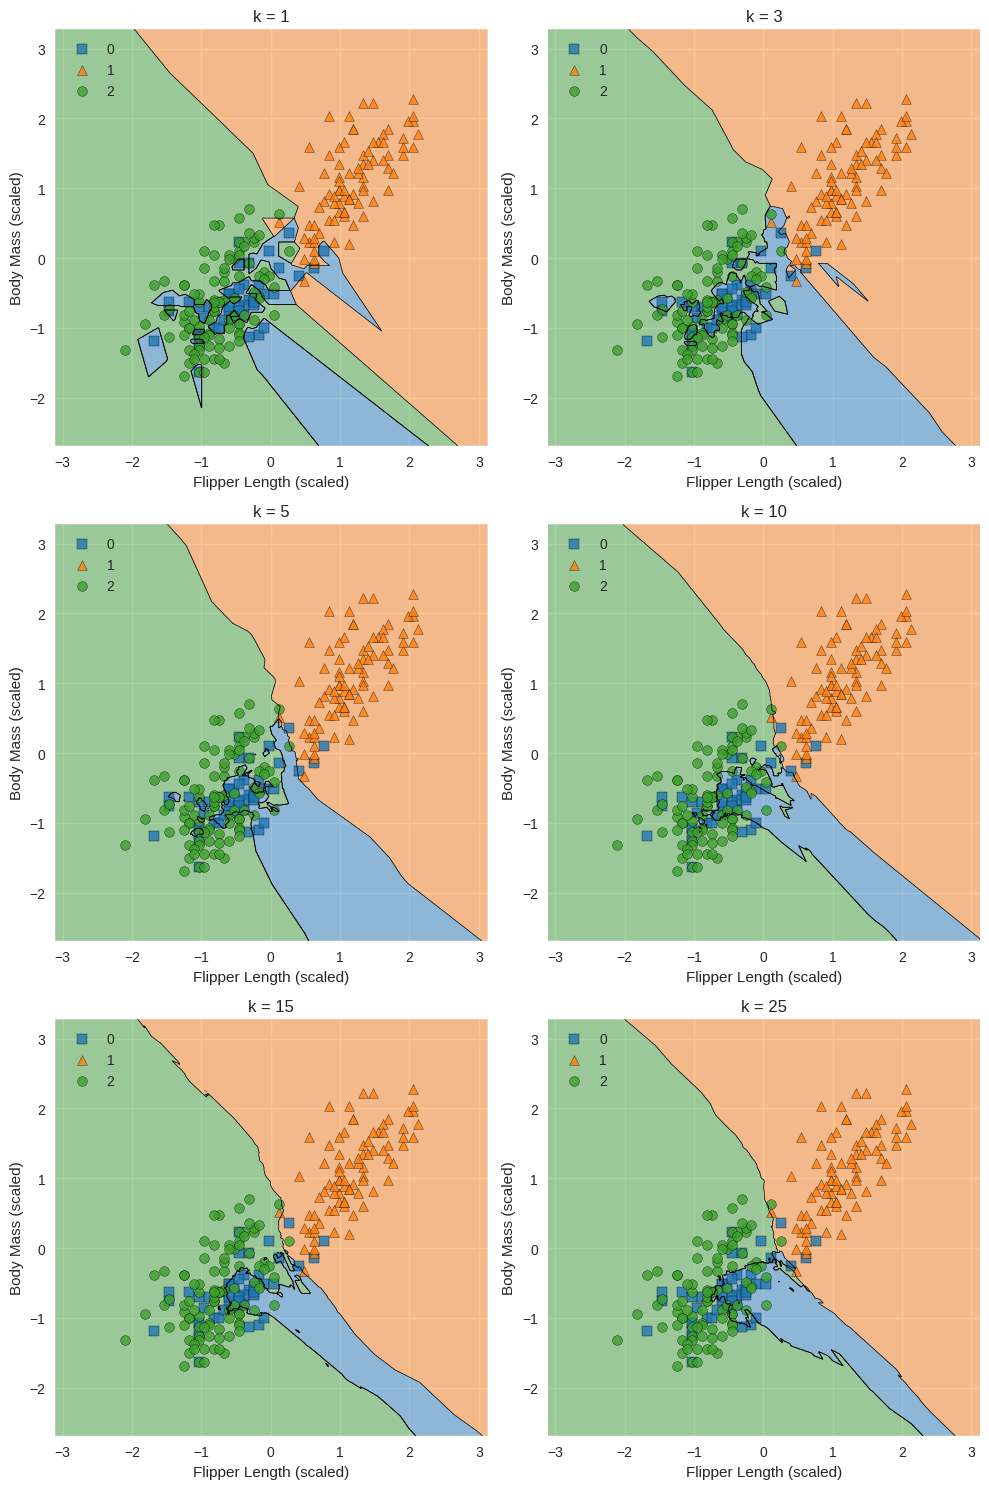

In [86]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Визуализация решающих поверхностей
gs = gridspec.GridSpec(3, 2) # 3 rows, 2 columns for 6 plots

fig = plt.figure(figsize=(10, 15))

labels = [f'k = {n}' for n in n_neighbors_list]

# Correcting the indices for the 3x2 grid
for knn, lab, g in zip(knn_classifiers, labels, itertools.product(range(3), range(2))):
    ax = plt.subplot(gs[g[0], g[1]])
    # plot_decision_regions requires the target variable to be integer type
    fig = plot_decision_regions(X=X_train_scaled, y=y_train.ravel().astype(np.int64), clf=knn, legend=2, ax=ax)
    ax.set_title(lab)
    ax.set_xlabel('Flipper Length (scaled)')
    ax.set_ylabel('Body Mass (scaled)')

plt.tight_layout()
plt.show()

**Задача 1.6** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

In [94]:
## При малом k=1, модель "запоминает" тренировочные данные (высокая точность на тренировке), но плохо работает на новых (низкая точность на тесте) — это переобучение. Решающая граница сложная.
## При увеличении k, модель обобщает лучше (точность на тренировке падает, на тесте растет или стабилизируется). Решающая граница становится более гладкой.
## Оптимальный k дает лучшую точность на тестовых данных. В наших результатах это k=25.
## Таким образом, k контролирует баланс между "следованием" за тренировочными данными и "сглаживанием" для лучшей работы на новых данных.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

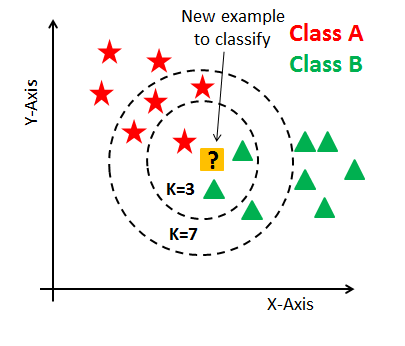

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [88]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k: int):
        if not isinstance(k, int) or k <= 0:
            raise ValueError("k должно быть положительным целым числом")
        self.k = k
        self._X_train = None
        self._y_train = None

    def fit(self, X, y):
        """
        Обучает классификатор KNN.
        Просто сохраняет тренировочные данные.
        """
        if X.shape[0] != y.shape[0]:
            raise ValueError("Количество образцов в X и y должно быть одинаковым")
        self._X_train = X
        self._y_train = y

    def predict(self, X):
        """
        Предсказывает метки классов для входных данных X.
        """
        if self._X_train is None or self._y_train is None:
            raise RuntimeError("Классификатор еще не обучен. Сначала вызовите fit().")

        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        """
        Предсказывает метку класса для одного входного примера x.
        """
        # Вычисляем расстояния от x до всех точек в тренировочной выборке
        distances = [self.count_distance(x, x_train) for x_train in self._X_train]

        # Находим индексы k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]

        # Получаем метки классов k ближайших соседей
        k_nearest_labels = self._y_train[k_indices]

        # Определяем наиболее частый класс среди k соседей
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def count_distance(self, x1, x2):
        """
        Вычисляет евклидово расстояние между двумя точками.
        """
        # Используем np.linalg.norm для вычисления евклидова расстояния
        return np.linalg.norm(x1 - x2)

In [89]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [90]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [91]:
from sklearn.metrics import accuracy_score
n_neighbors_list = [1, 3, 5, 10, 15, 25]

best_accuracy = 0
best_k = -1

print("Тестирование собственной реализации KNN:")
for k in n_neighbors_list:
    knn_manual = KNN(k=k)
    knn_manual.fit(X_train_scaled, y_train.ravel())
    y_test_pred_manual = knn_manual.predict(X_test_scaled)

    test_accuracy_manual = accuracy_score(y_test.ravel(), y_test_pred_manual)

    print(f"  k = {k}: Доля правильных ответов на тестовой выборке: {test_accuracy_manual:.4f}")

    if test_accuracy_manual > best_accuracy:
        best_accuracy = test_accuracy_manual
        best_k = k

print("-" * 30)
print(f"Лучший результат на тестовой выборке достигнут при k = {best_k} с точностью: {best_accuracy:.4f}")

Тестирование собственной реализации KNN:
  k = 1: Доля правильных ответов на тестовой выборке: 0.7449
  k = 3: Доля правильных ответов на тестовой выборке: 0.7551
  k = 5: Доля правильных ответов на тестовой выборке: 0.7755
  k = 10: Доля правильных ответов на тестовой выборке: 0.7857
  k = 15: Доля правильных ответов на тестовой выборке: 0.7653
  k = 25: Доля правильных ответов на тестовой выборке: 0.8367
------------------------------
Лучший результат на тестовой выборке достигнут при k = 25 с точностью: 0.8367


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [96]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [97]:
print("Количество пропущенных значений в каждой колонке:")
print(data.isnull().sum())

data.dropna(inplace=True)
print("\nРазмер данных после удаления пропущенных значений:", data.shape)

# Проверка на бессмысленные столбцы. Столбец 'Unnamed: 0' выглядит как индекс и не несет полезной информации.
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)
    print("Столбец 'Unnamed: 0' удален.")

print("\nПервые 5 строк данных после обработки:")
display(data.head())

Количество пропущенных значений в каждой колонке:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Размер данных после удаления пропущенных значений: (53940, 11)
Столбец 'Unnamed: 0' удален.

Первые 5 строк данных после обработки:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [98]:
# Выбираем только числовые столбцы и целевую переменную 'price'
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
# Убедимся, что 'price' включена в список, если она числовая
if 'price' not in numerical_cols:
    if 'price' in data.columns:
        numerical_cols.append('price')
    else:
        print("Предупреждение: Столбец 'price' не найден в данных.")

# Рассчитываем матрицу корреляций
correlation_matrix = data[numerical_cols].corr()

# Выводим матрицу корреляций
print("Матрица корреляций между числовыми признаками и price:")
display(correlation_matrix)

# Находим признаки с наибольшей корреляцией по модулю с 'price'
# Исключаем корреляцию price с самим собой
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_price = correlation_with_price.drop('price') # Удаляем самокорреляцию

print("\nПризнаки с наибольшей корреляцией по модулю с price:")
display(correlation_with_price.abs().sort_values(ascending=False))

Матрица корреляций между числовыми признаками и price:


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000



Признаки с наибольшей корреляцией по модулю с price:


,price
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
table,0.127134
depth,0.010647


**Задача 3.3** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [99]:
# Выбираем категориальные признаки (исключая целевую переменную, если она была бы категориальной)
categorical_cols = data.select_dtypes(include='object').columns

# Применяем OneHot-кодирование
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("Данные после OneHot-кодирования:")
display(data_encoded.head())
print("\nРазмер данных после кодирования:", data_encoded.shape)

Данные после OneHot-кодирования:


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False



Размер данных после кодирования: (53940, 24)


**Задача 3.4** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [100]:
from sklearn.model_selection import train_test_split

# Определяем признаки (X) и целевую переменную (y) из закодированных данных
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер тренировочной выборки X_train: {X_train.shape}")
print(f"Размер тестовой выборки X_test: {X_test.shape}")
print(f"Размер тренировочной выборки y_train: {y_train.shape}")
print(f"Размер тестовой выборки y_test: {y_test.shape}")

✅ Данные разделены на тренировочную и тестовую выборки.
Размер тренировочной выборки X_train: (37758, 23)
Размер тестовой выборки X_test: (16182, 23)
Размер тренировочной выборки y_train: (37758,)
Размер тестовой выборки y_test: (16182,)


**Задача 3.5** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

**Задача 3.6** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

**Задача 3.7** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

**Задача 3.8** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

## Бонусная часть

**Задача 3.9** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

**Задача 3.11** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

**Задача 3.12** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.